In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [21]:
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [22]:
#Format the date time index as specified
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
#Sort in increasing order of date-time
data = data.sort_values('Month')
data.set_index(data['Month'], drop = True, inplace = True)
data.drop('Month', axis = 1, inplace = True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


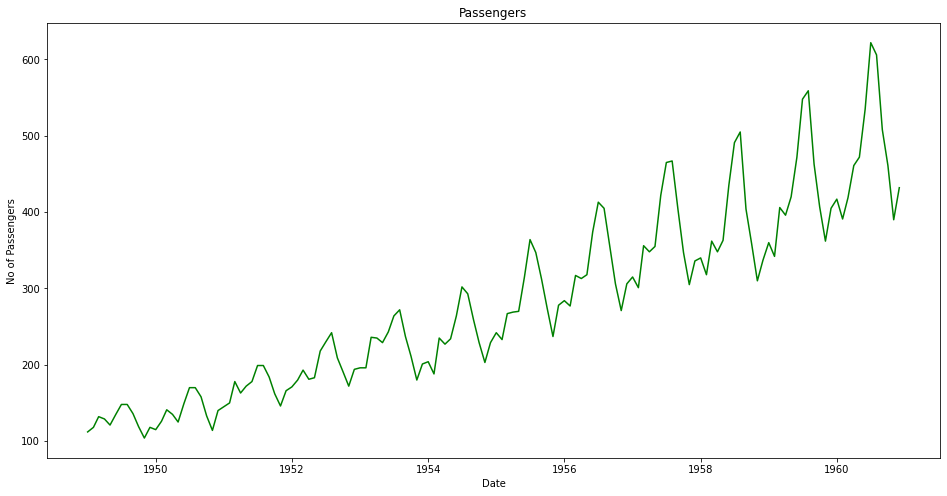

In [23]:
#visualisation
plt.figure(figsize=(16, 8))
plt.title('Passengers')
plt.xlabel('Date')
plt.ylabel('No of Passengers')
plt.plot(data, color = 'green')
plt.show()

In [24]:
data_final = data
scaler = MinMaxScaler()
data_final.loc[:, ['#Passengers']] = scaler.fit_transform(data_final.loc[:, ['#Passengers']])
data_final

,#Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819
...,...
1960-08-01,0.969112
1960-09-01,0.779923
1960-10-01,0.689189


In [25]:
#Train - Test split
train_len = round(len(data_final) * 0.7)
training_data = data_final[:train_len]
training_data.head()

,#Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


In [26]:
testing_data = data_final[train_len:]
testing_data.head()

,#Passengers
Month,
1957-06-01,0.613900
1957-07-01,0.696911
1957-08-01,0.700772
1957-09-01,0.579151
1957-10-01,0.469112


In [118]:
#Create training and testing seqeunces along with their prediction labels
def makeSeq(dataset):
  sequences = []
  labels = []
  starting = 0

  for stopping in range(1, len(dataset)): 
    sequences.append(dataset.iloc[starting : stopping])
    labels.append(dataset.iloc[stopping])
    starting += 1
  return (np.array(sequences).astype('float32'), np.array(labels).astype('float32'))

In [119]:
training_seq, training_labels = makeSeq(training_data)
testing_seq, testing_labels = makeSeq(testing_data)

In [120]:
print(np.shape(training_seq), np.shape(training_labels))
print(np.shape(testing_seq), np.shape(testing_labels))

(100, 1, 1) (100, 1)
(42, 1, 1) (42, 1)


In [121]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [252]:
#LSTM Model
model = Sequential()
model.add(LSTM(4, input_shape = (training_seq.shape[1], training_seq.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = 'mean_absolute_error')
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 4)                 96        
                                                                 
 dense_33 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [253]:
history = model.fit(training_seq, training_labels, epochs = 50, verbose = 1, batch_size = 1, validation_data = (testing_seq, testing_labels))

Epoch 1/50
100/100 [==============================] - 3s 10ms/step - loss: 0.0580 - mean_absolute_error: 0.1923 - val_loss: 0.3098 - val_mean_absolute_error: 0.5342
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.1313 - val_loss: 0.2199 - val_mean_absolute_error: 0.4434
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.1211 - val_loss: 0.1788 - val_mean_absolute_error: 0.3961
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.1185 - val_loss: 0.1536 - val_mean_absolute_error: 0.3646
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.1147 - val_loss: 0.1425 - val_mean_absolute_error: 0.3507
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.1107 - val_loss: 0.1321 - val_mean_absolute_error: 0.3373
Epoch 7/50
100/

Text(0, 0.5, 'Loss')

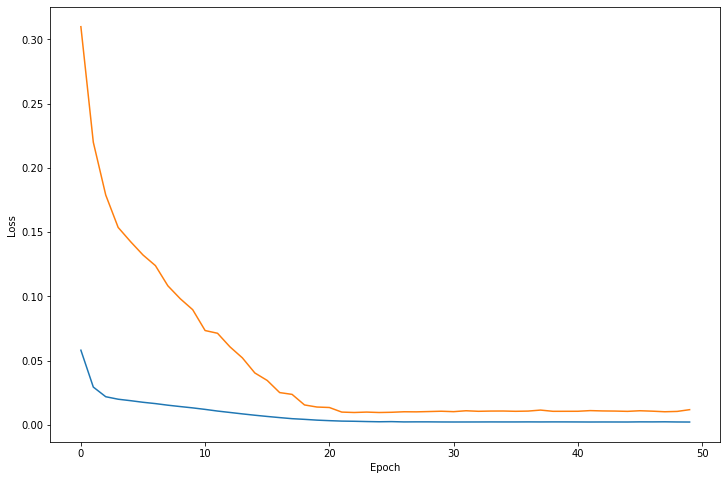

In [254]:
plt.figure(figsize = (12, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

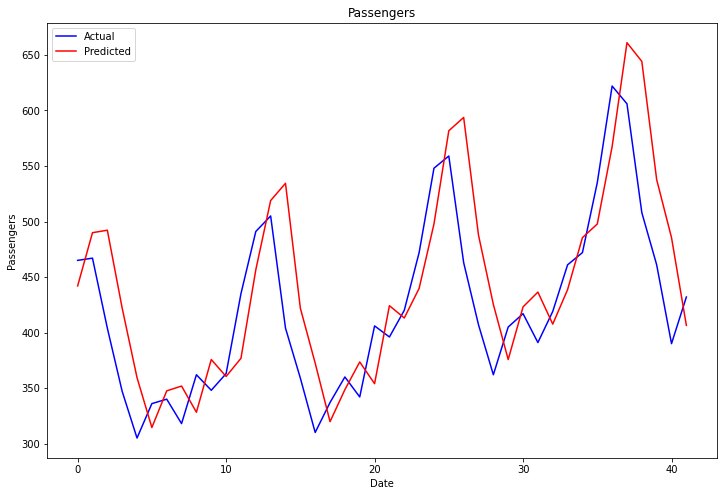

In [255]:
labels_predicted = model.predict(testing_seq)
labels_predicted = scaler.inverse_transform(labels_predicted)
plt.figure(figsize = (12, 8))
plt.plot(scaler.inverse_transform(testing_labels), color = 'blue', label = 'Actual')
plt.plot(labels_predicted , color = 'red', label = 'Predicted')
plt.title('Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [256]:
score = model.evaluate(testing_seq, testing_labels, verbose = 1)

2/2 [==============================] - 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0868


In [257]:
actual_labels = scaler.inverse_transform(testing_labels)

In [260]:
mape = np.abs(np.mean((labels_predicted - actual_labels) / actual_labels))
print('MAPE: '+str(mape))

MAPE: 0.05276669
